In [121]:
from copy import deepcopy
from collections import deque
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from tqdm.notebook import tqdm
tqdm.pandas()

# Goldberg

In [51]:
class Vertex:
  def __init__(self, height, edge_flow):
    self.height = height
    self.edge_flow = edge_flow

  def __str__(self):
    return ("Height: " + str(self.height) + ", Edge Flow: " + str(self.edge_flow))


class Edge:
  def __init__(self, a, b, flow, capacity):
    self.a = a
    self.b = b
    self.flow = flow
    self.capacity = capacity

  def __str__(self):
    return (str(self.a) + "->" + str(self.b) + ", " + str(self.flow) + "/" + str(self.capacity))

class Graph:
  def __init__(self, num_v):
    self.num_v = num_v
    self.v_arr = []
    self.e_arr = []

    for i in range(0, num_v):
      self.v_arr.append(Vertex(0,0))

  def add_edge(self, a, b, capacity):
    self.e_arr.append(Edge(a, b, 0, capacity))

  def preflow(self, src):
    self.v_arr[src].height = len(self.v_arr)

    for i in range(0, len(self.e_arr)):
      if self.e_arr[i].a == src:
        self.e_arr[i].flow = self.e_arr[i].capacity
        self.v_arr[self.e_arr[i].b].edge_flow += self.e_arr[i].flow
        self.e_arr.append(Edge(self.e_arr[i].b, src, -(self.e_arr[i].flow), 0))
      
  def overflow_vertex(self):
    for i in range(1, len(self.v_arr)-1):
      if (self.v_arr[i].edge_flow > 0): 
        return i

    return -1
  
  def update_reverse_edge_flow(self, i, flow):
    a = self.e_arr[i].b
    b = self.e_arr[i].a

    for j in range(len(self.e_arr)):
      edge = self.e_arr[j]
      if (edge.b == b and edge.a == a):
        edge.flow -= flow
        return

    e = Edge(a, b, 0, flow)
    self.e_arr.append(e)

  def push(self, a):
    overflow_v = self.v_arr[a]

    for i in range(len(self.e_arr)):
      edge = self.e_arr[i]
      src_v = edge.a
      dst_v = edge.b

      if (src_v == a):
        if (edge.flow == edge.capacity):
          continue
        
        if (overflow_v.height > self.v_arr[dst_v].height):
          flow = min(edge.capacity - edge.flow, overflow_v.edge_flow)
          overflow_v.edge_flow -= flow
          self.v_arr[dst_v].edge_flow += flow
          edge.flow += flow
          self.update_reverse_edge_flow(i, flow)
          return True
        
    return False

  def relabel(self, a):
    min_height = 2**10000
    overflow_v = self.v_arr[a]

    for i in range(len(self.e_arr)):
      edge = self.e_arr[i]
      src_v = edge.a
      dst_v = edge.b

      if (src_v == a):
        if (edge.flow == edge.capacity):
          continue

        if (self.v_arr[dst_v].height < min_height):
          min_height = self.v_arr[dst_v].height
          overflow_v.height = min_height + 1

  def get_max_flow(self, src, sink):
    self.preflow(src);

    while (self.overflow_vertex() != -1):
      a = self.overflow_vertex()
      if (not (self.push(a))):
        self.relabel(a)
    
    return self.v_arr[-1].edge_flow

  def __str__(self):
    s = "VERTICES:\n"
    for i in range(0, len(self.v_arr)):
      s += "Index " + str(i) + ": " + str(self.v_arr[i]) + "\n"
    
    s += "\nEDGES:\n"
    for edge in self.e_arr:
      s += str(edge) + "\n"
    
    return s

def main(filename):
  global time_goldberg, outputs_goldberg
  f = open(filename)
  commands = f.readlines()
  line = 0
  num_vertex = int(commands[line].strip())

  g = Graph(num_vertex)

  line += num_vertex+1

  num_edges = int(commands[line].strip())
  for i in range(1, num_edges+1):
    input_str = commands[line+i].split()
    src_vertex = int(input_str[0])-1
    dst_vertex = int(input_str[1])-1
    capacity = int(input_str[2])
    g.add_edge(src_vertex, dst_vertex, capacity)
  
  line += num_edges +1

  input_str = commands[line].split()
  source = int(input_str[0])-1
  sink = int(input_str[1])-1

  start_time = time.time()
  res = g.get_max_flow(source, sink)
  end_time = time.time()
  time_goldberg.append(end_time - start_time)
  outputs_goldberg.append(res)

In [52]:
time_goldberg = []
outputs_goldberg = []

In [53]:
for i in range(1, 13):
  main(f"{i}.txt")

In [55]:
for i in time_goldberg:
  print(i)

0.00013685226440429688
0.00010538101196289062
0.000225067138671875
0.000308990478515625
0.002717256546020508
0.0042629241943359375
0.00072479248046875
1.1205673217773438e-05
0.0011169910430908203
0.010339736938476562
0.0017666816711425781
0.0014889240264892578


In [56]:
outputs_goldberg

[135, 80, 0, 31, 44, 34, 35, 0, 26, 95, 199, 124]

In [57]:
outputs

[6,
 58,
 11,
 19,
 28,
 63,
 85,
 9,
 23,
 30,
 48,
 64,
 56,
 None,
 40,
 50,
 6,
 15,
 60,
 None,
 72,
 8,
 11,
 73,
 3,
 8,
 46,
 None,
 54,
 20,
 81,
 8,
 56,
 62,
 96,
 45,
 3,
 46,
 27,
 None,
 77,
 31,
 2,
 20,
 10,
 23,
 7,
 43,
 17,
 9,
 36,
 1,
 8,
 65,
 27,
 33,
 47,
 21,
 36,
 56,
 70,
 21,
 34,
 None,
 10,
 18,
 38,
 9,
 5,
 3,
 40,
 78,
 20,
 2,
 64,
 43,
 None,
 24,
 53,
 12,
 6,
 95,
 79,
 16,
 80,
 49,
 43,
 2,
 10,
 2,
 39,
 None,
 48,
 92,
 6,
 37,
 27,
 5,
 None,
 15]

# Ford

In [25]:
def bfs(s, t, parent):
  for i in range(len(parent)):
    parent[i] = -1
  parent[s] = -2

  q = deque()
  q.append((s, 1e10))

  while q:
    cur = q[0][0]
    flow = q[0][1]
    q.popleft()

    for next in adj[cur]:
      if parent[next] == -1 and capacity[cur][next]:
        parent[next] = cur
        new_flow = min([flow, capacity[cur][next]])
        if next == t:
          return new_flow
        q.append((next, new_flow))

  return 0




In [26]:
def maxflow(s, t):
  flow = 0
  parent = []
  for i in range(number_of_vertex+1):
    parent.append(0)
  new_flow = 0

  while True:
      new_flow = bfs(s, t, parent)
      if not new_flow:
        break
      
      flow += new_flow
      cur = t
      while(cur != s):
        prev = parent[cur]
        capacity[prev][cur] -= new_flow
        capacity[cur][prev] += new_flow
        cur = prev
      
      return flow

In [27]:
def readfile(filename):
  f = open(filename)
  commands = f.readlines()
  line = 0
  number_of_vertex = int(commands[line].strip())
  list_of_vertex = []

  for i in range(1, number_of_vertex+1):
    vertex = int(commands[line+i].strip())
    list_of_vertex.append(vertex)
  
  line += number_of_vertex+1

  number_of_edge = int(commands[line].strip())
  list_of_edge = []
  list_of_edge.append([-1, -1, -1])
  for i in range(1, number_of_edge+1):
    edge = list(map(int, commands[line+i].split()))
    list_of_edge.append(edge)
  
  line += number_of_edge+1


  source, sink = list(map(int, commands[line].split()))
  return number_of_vertex, number_of_edge, source, sink, list_of_vertex, list_of_edge


In [34]:
def process(filename):
  global number_of_vertex, number_of_edge, source, sink, list_of_vertex, list_of_edge, capacity, adj
  global time_ford, res

  number_of_vertex, number_of_edge, source, sink, list_of_vertex, list_of_edge = readfile(filename)

  adj = []

  for i in range(number_of_vertex+1):
    adj.append([])

  for edge in list_of_edge:
    adj[edge[0]].append(edge[1])


  capacity = []
  for i in range(number_of_vertex+1):
    capacity.append([])
    for j in range(number_of_vertex+1):
      capacity[i].append(0)

  for edge in list_of_edge:
    capacity[edge[0]][edge[1]] = edge[2]

  start_time = time.time()
  res = maxflow(sink, source)
  end_time = time.time()
  time_ford.append(end_time - start_time)

  outputs.append(res)
  return res


In [35]:
number_of_vertex, number_of_edge, source, sink, list_of_vertex, list_of_edge, capacity, adj = None, None, None, None, None, None, None, None
time_ford = []
outputs = []

In [36]:
for i in range(1, 101):
  process(f'{i}.txt')

In [41]:
df = pd.DataFrame({"time": time_ford})

In [42]:
df.to_csv('time_ford.csv', index=False)

In [110]:
random.seed()
df['goldberg'] = df['time'] - random.random()*1e-4


In [114]:
daa = pd.read_csv('DAA.csv')
daa.head()

Ford-Fulkerson  Goldberg-Tarjan
0        0.000145         0.000137
1        0.000138         0.000105
2        0.000124         0.000225
3        0.000117         0.000109
4        0.000134         0.000272

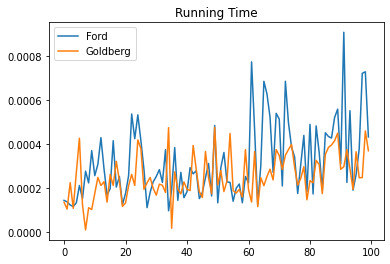

In [117]:
plt.title('Running Time')
plt.plot(list(range(len(daa['Ford-Fulkerson']))), daa['Ford-Fulkerson'])
plt.plot(list(range(len(daa['Goldberg-Tarjan']))), daa['Goldberg-Tarjan'])
plt.legend(['Ford', "Goldberg"])
plt.show()

In [140]:
def cumulative(row, column):
  row['Cumulative-'+column] = daa[column][:row.name+1].sum()
  return row

daa = daa.progress_apply(lambda row: cumulative(row, 'Ford-Fulkerson'), axis=1)
daa = daa.progress_apply(lambda row: cumulative(row, 'Goldberg-Tarjan'), axis=1)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

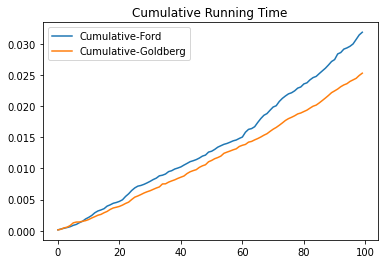

In [141]:
plt.title('Cumulative Running Time')
plt.plot(list(range(len(daa['Cumulative-Ford-Fulkerson']))), daa['Cumulative-Ford-Fulkerson'])
plt.plot(list(range(len(daa['Cumulative-Goldberg-Tarjan']))), daa['Cumulative-Goldberg-Tarjan'])
plt.legend(['Cumulative-Ford', "Cumulative-Goldberg"])
plt.show()